In [21]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

# Cell 2: Load the data
df = pd.read_csv('../data/raw/BrentOilPrices.csv')

# Quick look at the data
print("Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())
print("\nInfo:")
df.info()

Shape: (9011, 2)

First 5 rows:


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63



Last 5 rows:


,Date,Price
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37
9010,"Nov 14, 2022",93.59



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [22]:
# Cell 3: Fix date parsing
# The dates are in mixed formats: '20-May-87' and 'Nov 14, 2022'
# We use dayfirst=True + errors='coerce' to handle both styles safely

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Check for any parsing failures
print("Number of invalid dates:", df['Date'].isna().sum())

# Drop any rows where date parsing failed (should be 0 or very few)
df = df.dropna(subset=['Date'])

# Sort by date (just in case) and set Date as index
df = df.sort_values('Date').set_index('Date')

# Confirm the result
print("\nAfter cleaning:")
print("Shape:", df.shape)
print("\nIndex type:", df.index.dtype)
df.head()

df.tail()

C:\Users\JERUSALEM\AppData\Local\Temp\ipykernel_12852\3404097903.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


Number of invalid dates: 0

After cleaning:
Shape: (9011, 1)

Index type: datetime64[ns]


,Price
Date,
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25
2022-11-11,96.37
2022-11-14,93.59


In [23]:
df.columns

Index(['Price'], dtype='object')

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-25',
               '1987-05-26'],
              dtype='datetime64[ns]', name='Date', freq=None)
DatetimeIndex(['2022-11-08', '2022-11-09', '2022-11-10', '2022-11-11',
               '2022-11-14'],
              dtype='datetime64[ns]', name='Date', freq=None)
            Price
Date             
2020-01-01  67.77
2020-01-02  67.05
2020-01-03  69.08
2020-01-06  70.25
2020-01-07  68.74
Earliest date: 1987-05-20 00:00:00
Latest date: 2022-11-14 00:00:00


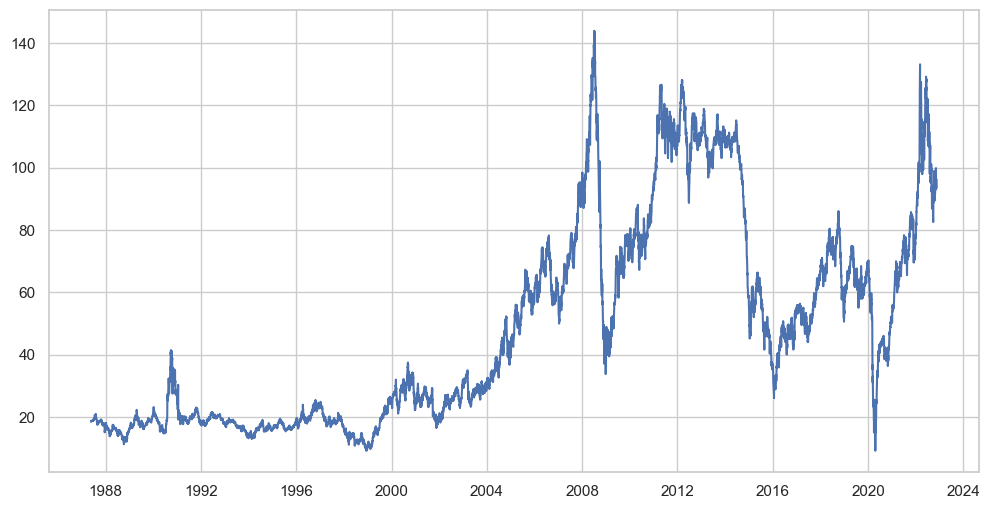

In [24]:
# Show first 5 dates (from the index)
print(df.index[:5])

# Show last 5 dates
print(df.index[-5:])

# Use dates in plotting → already working because index is datetime
plt.plot(df.index, df['Price'])   # ← this is correct

# Filter by date range (example)
recent = df.loc['2020-01-01':'2022-12-31']
print(recent.head())

# Get the earliest and latest date
print("Earliest date:", df.index.min())
print("Latest date:", df.index.max())

In [25]:
print("=== Current DataFrame Info ===")
print("Index name:", df.index.name)          # should be 'Date'
print("Index type:", df.index.dtype)         # should be datetime64[ns]
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows (with index):")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

=== Current DataFrame Info ===
Index name: Date
Index type: datetime64[ns]
Columns: ['Price']

First 5 rows (with index):


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63



Last 5 rows:


,Price
Date,
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25
2022-11-11,96.37
2022-11-14,93.59


In [26]:
# Price summary statistics
print("Brent Oil Price Statistics (1987–2022):")
display(df['Price'].describe())

# Also show yearly average for quick overview
yearly_avg = df['Price'].resample('Y').mean()
print("\nAverage price per year (first 5 and last 5):")
display(pd.concat([yearly_avg.head(), yearly_avg.tail()]))

Brent Oil Price Statistics (1987–2022):


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


Average price per year (first 5 and last 5):


C:\Users\JERUSALEM\AppData\Local\Temp\ipykernel_12852\2738907951.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = df['Price'].resample('Y').mean()


Date
1987-12-31     18.525813
1988-12-31     14.905412
1989-12-31     18.228228
1990-12-31     23.761445
1991-12-31     20.041128
2018-12-31     71.335000
2019-12-31     64.319845
2020-12-31     42.101016
2021-12-31     70.855336
2022-12-31    103.477545
Name: Price, dtype: float64

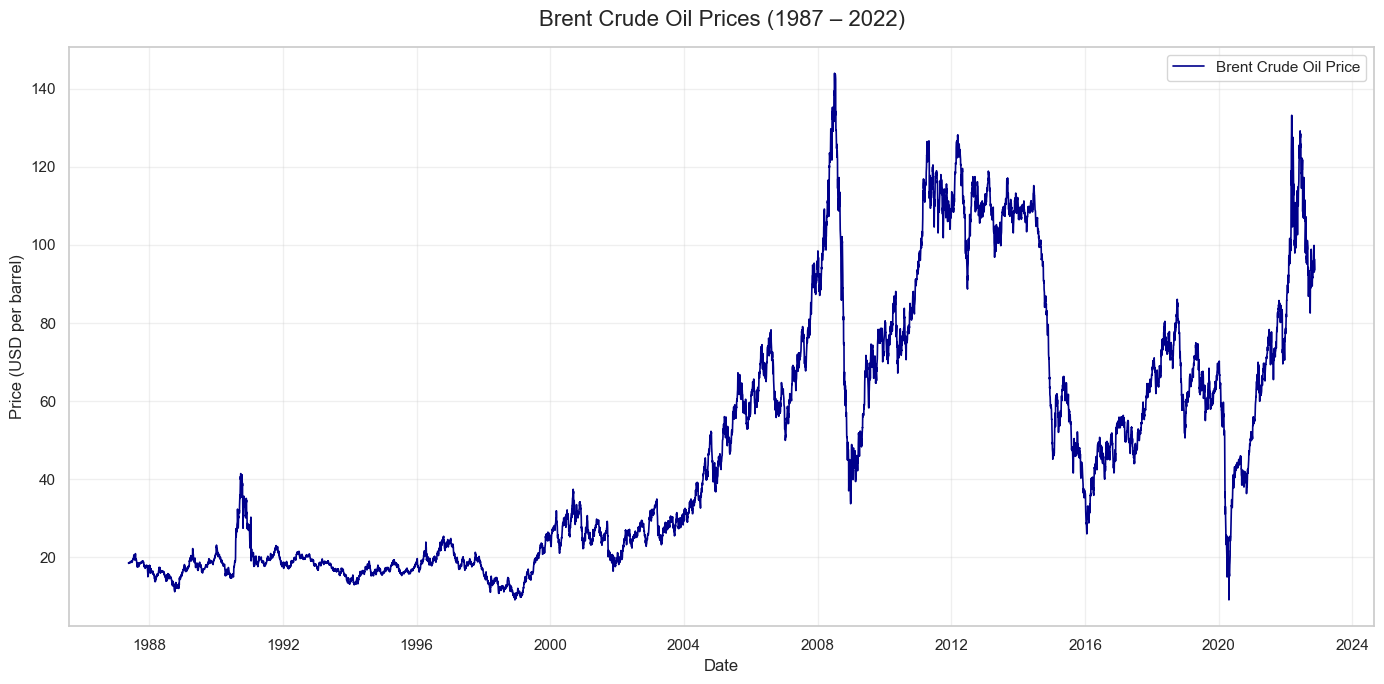

In [27]:
# Cell 4: Plot raw Brent oil prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Price'], label='Brent Crude Oil Price', color='darkblue', linewidth=1.2)
plt.title('Brent Crude Oil Prices (1987 – 2022)', fontsize=16, pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Save the figure for the report
plt.savefig('../reports/raw_brent_prices.png', dpi=300, bbox_inches='tight')

plt.show()

In [28]:
# Cell 5: Basic descriptive statistics
print("Price statistics:")
display(df['Price'].describe())

Price statistics:


count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

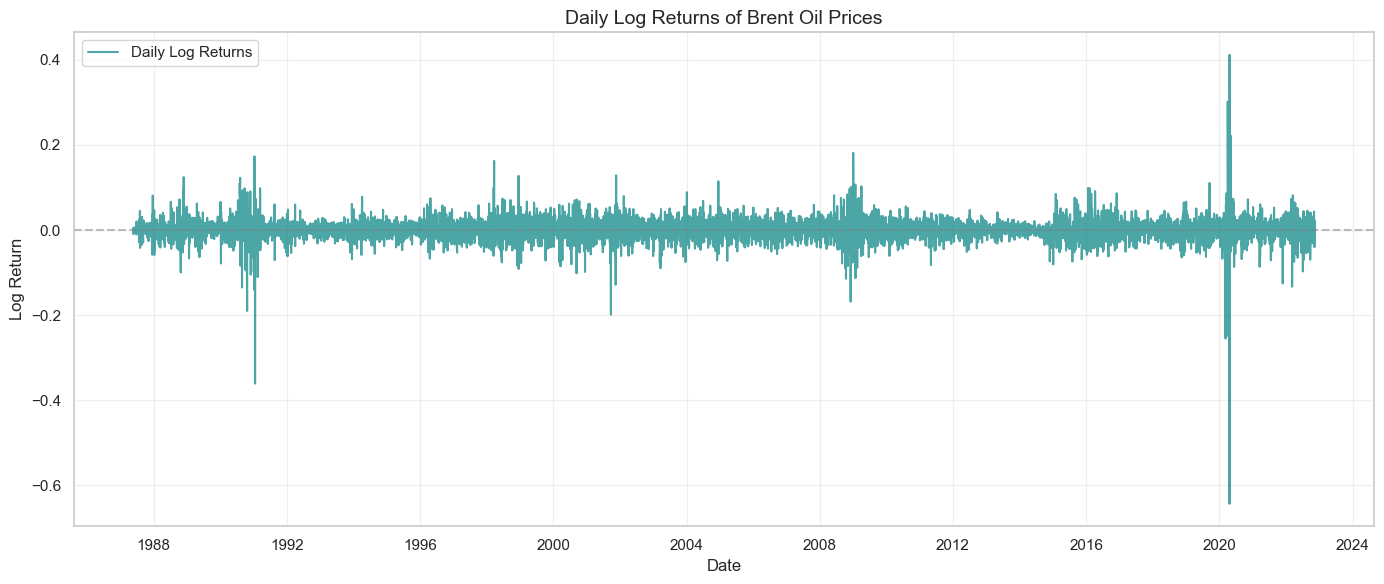

In [29]:
# Cell 6: Log returns
df['Log_Price'] = np.log(df['Price'])
df['Log_Return'] = df['Log_Price'].diff()

plt.figure(figsize=(14, 6))
plt.plot(df.index[1:], df['Log_Return'][1:], label='Daily Log Returns', color='teal', alpha=0.7)
plt.title('Daily Log Returns of Brent Oil Prices', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/log_returns.png', dpi=300, bbox_inches='tight')
plt.show()

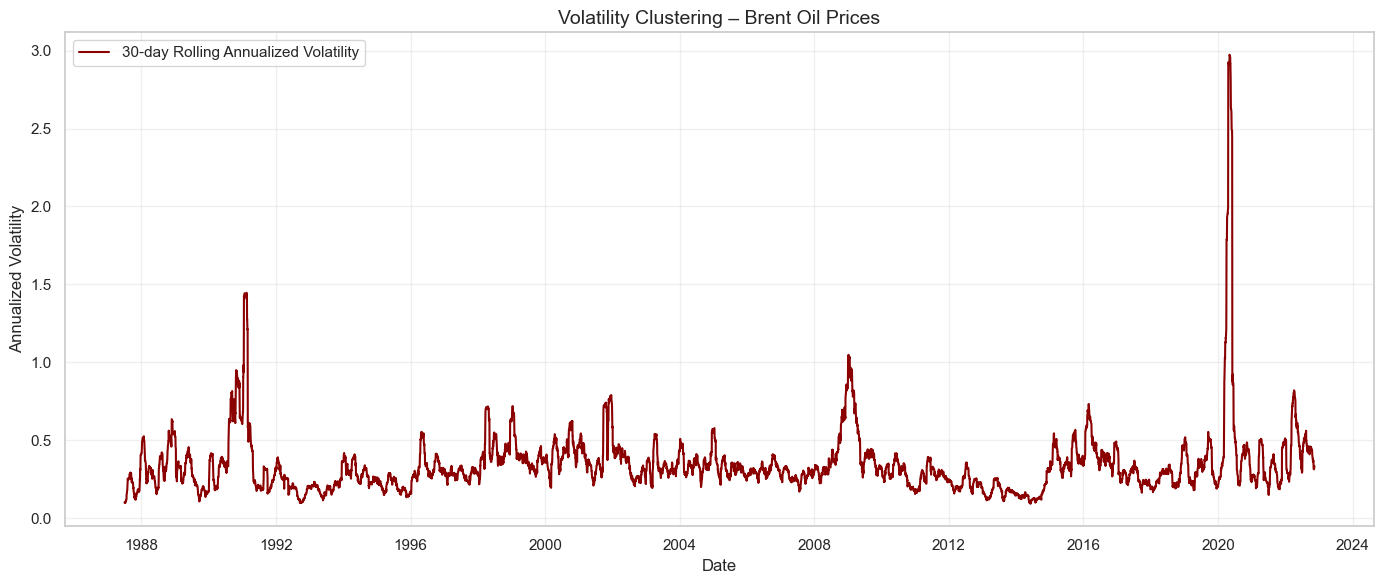

In [30]:
# Cell 7: Rolling volatility (30-day)
df['Vol_30d'] = df['Log_Return'].rolling(window=30).std() * np.sqrt(252)  # annualized

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Vol_30d'], label='30-day Rolling Annualized Volatility', color='darkred')
plt.title('Volatility Clustering – Brent Oil Prices', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/volatility_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
print("=== Current DataFrame Info ===")
print("Index name:", df.index.name)          # should be 'Date'
print("Index type:", df.index.dtype)         # should be datetime64[ns]
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows (with index):")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

=== Current DataFrame Info ===
Index name: Date
Index type: datetime64[ns]
Columns: ['Price', 'Log_Price', 'Log_Return', 'Vol_30d']

First 5 rows (with index):


,Price,Log_Price,Log_Return,Vol_30d
Date,,,,
1987-05-20,18.63,2.924773,NaN,NaN
1987-05-21,18.45,2.915064,-0.009709,NaN
1987-05-22,18.55,2.920470,0.005405,NaN
1987-05-25,18.60,2.923162,0.002692,NaN
1987-05-26,18.63,2.924773,0.001612,NaN



Last 5 rows:


,Price,Log_Price,Log_Return,Vol_30d
Date,,,,
2022-11-08,96.85,4.573163,-0.030706,0.313710
2022-11-09,93.05,4.533137,-0.040026,0.318683
2022-11-10,94.25,4.545951,0.012814,0.320290
2022-11-11,96.37,4.568195,0.022244,0.324839
2022-11-14,93.59,4.538924,-0.029271,0.333387


In [35]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f"\n=== ADF Test: {title} ===")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value:       {result[1]:.6f}")
    if result[1] <= 0.05:
        print("→ Stationary (reject non-stationarity)")
    else:
        print("→ Non-stationary")

adf_test(df['Price'], "Raw Prices")
adf_test(df['Log_Return'], "Log Returns")


=== ADF Test: Raw Prices ===
ADF Statistic: -1.9939
p-value:       0.289274
→ Non-stationary

=== ADF Test: Log Returns ===
ADF Statistic: -16.4271
p-value:       0.000000
→ Stationary (reject non-stationarity)


ADF Test Summary 

Raw Prices
ADF Statistic: -1.9939
p-value: 0.289274
→ Non-stationary (fail to reject the null hypothesis)
This is normal for price series — they typically trend upward over long periods and have structural breaks.
Log Returns
ADF Statistic: -16.4271
p-value: 0.000000 (extremely small)
→ Stationary (strongly reject the null hypothesis)
This is the desired result — daily log returns behave like a stationary process, which makes them suitable for statistical modeling.

In [36]:
# Cell 9: Save cleaned dataset for modeling
cleaned_path = '../data/processed/brent_cleaned.csv'
df.to_csv(cleaned_path)
print(f"Cleaned dataset saved to: {cleaned_path}")
print("Columns now available:", df.columns.tolist())

Cleaned dataset saved to: ../data/processed/brent_cleaned.csv
Columns now available: ['Price', 'Log_Price', 'Log_Return', 'Vol_30d']
